# PCA tutorial for Diodon (python)

This is an elementary tutorial for PCA with Diodon. 

## How to run a PCA: a minimalist program

The tutorial programm for running PCA in this section is very short, and given here as a first step. It will be explained step by step along this notebok. Some developments with various options will be presented. The dataset used in this tutorial is `doubs_env` from `ade4`. 


```Python  

# importing library
import pydiodon as dio 

# loading dataset with function load_dataset() of pydiodon
dataset = "ade4_doubs_env"
A, colnames, rownames = dio.load_dataset(dataset)

# running PCA with function pca() of pydiodon
Y, L, V	= dio.pca(A)

```
It is followed by a few functions for plotting the results

```Python

# plotting the results
dio.plot_eig(L, frac=True, cum=True, dot_size=20, title = "cumulated eigenvalues")
dio.plot_components_scatter(Y, dot_size=5, title="Principal components")
dio.plot_var(V, varnames=colnames)

```
and interpreting the quality of the projection on the princial axis.

#### Here are some comments 
- first step is to import pydiodon
- second step is to load a data set; here, it is a dataset given as an example for pydiodon in companion git `diodon_companion` (see section install of the readme of pydiodon gitlab).
- third step is the core of the analysis: running PCA on the dataset
- last steps are for displaying classical plots for visualising the resut.   

These steps are detailed in following sections. It will be useful to look as well at the online documentation available at https://diodon.gitlabpages.inria.fr/pydiodon

## Importing python version of diodon

In [1]:
import pydiodon as dio 

loading pydiodon - version 23.01.28


and for side interpretations and complements, import numpy as well: 

In [2]:
import numpy as np

## Loading dataset

This is made simply by a call to function load_dataset(). This function loads automatically one of the dataset provided as an example. The example is the file `doubs$env` provided by ade4. It represents 30 sites along the river Doubs (in rows)  and 11 environmental variables in columns (see http://pbil.univ-lyon1.fr/ADE-4/ade4-html/doubs.html for a detailed description). 

 
**Note:** For the call to work, the user must be in the directory where the datasets are, which is the same as the directory where the jupyter notebooks are. It is possible to call datasets from another directory, by using argument `datadir`; see online documentation of `load_dataset()` for details.

In [3]:
dataset = "ade4_doubs_env"
A, rownames, colnames = dio.load_dataset(dataset) 

dataset ade4_doubs_env loaded, with 30 rows and 11 columns.


This yields:
- `A`, a numpy array representing a $m \times n$ matrix, the values in the dataset   
- `colnames`: a list of strings, representing the names of the headers for columns
- `rownames`: a lits of strings, representing the row names

Then check it has been correctly uploaded

In [4]:
m	= A.shape[0]
n	= A.shape[1]
print("data loaded ...")
print("Data array has " + str(m) + " rows and " + str(n) + " columns.")	

data loaded ...
Data array has 30 rows and 11 columns.


In [5]:
print("headers")
print((' ; ').join(colnames[0:5]) + ' ; ...')
print("\nrow names")
print((' ; ').join(rownames[0:5]) + ' ; ...')
print("\nvalues")
print(A[0:5, 0:5])

headers
dfs ; alt ; slo ; flo ; pH ; ...

row names
1 ; 2 ; 3 ; 4 ; 5 ; ...

values
[[  3.    934.      6.176  84.     79.   ]
 [ 22.    932.      3.434 100.     80.   ]
 [102.    914.      3.638 180.     83.   ]
 [185.    854.      3.497 253.     80.   ]
 [215.    849.      3.178 264.     81.   ]]


## Analyzing dataset

The function to run a PCA is `pca()`. Here, we 
- present the arguments
- indicate the line to type to run the method
- present the results  

in the following sections.

###  Arguments

The arguments are (see as well https://diodon.gitlabpages.inria.fr/pydiodon)
- the array to analyze
- the pretreatment to apply
- the number of axis to compute
- the method for computing principal axis.  



`pretreatment`: a string: the pretreatment to run, among     
- `standard`: centering and scaling 
- `col_centering`: centering columnwise (the associated point cloud is translated to its barycenter)
- `scaling`: each variable (a column) is divided by its standard deviation; it is meaningful after columnwise centering only (this is the standard pretreatment) 
- `bicentering`: centering rowise and columnwise 

`k`: an integer; the number of axis to compute;  
default value is $k=-1$, which means that all axis are computed

`meth`: a string: the method to compute axis and components in the PCA. Choices are: 
- `evd`: computing the eigevectors and eigenvalues of $A'A$  
- `svd`: computing the SVD $A = U\Sigma V'$ of $A$
- `grp`: computing the first singular values and vectors of the SVD with Gaussian Random Projection


Default values are:   
- pretreatment = standard
- $k = -1$
- meth = svd


###  Calculation

In what follows, all arguments have their default value: PCA is run with pretreatment standard, computing all axis, and through the SVD of $A$.

In [6]:
Y, L, V	= dio.pca(A)
print("PCA done!")


-----------------------------------------
running pca()
Matrix A has 30 rows and 11 columns
rank is -1 (full rank if k = -1)
pretreatment is standard
method is svd
------------------------------------------

PCA done!


running pca with default values is equivalent to call:

```Python  
Y, L, V	= dio.pca(A, pretreatment="standard", k=-1, meth="svd")
``` 


###  Results 

The result of a call to `pca()` is a set of three arrays:  
- `Y`: a $m \times k$ 2D numpy array (if $k=-1$, a $m \times n$ array) with principal components, one set of components per column
- `L`: a 1D numpy array; the eigenvalues of $A^t A$, or the square of the singular values of $A$, up to $k$
- `V`: a $n \times k$ numpy array, with column $j$ being the $j^{th}$ principal axis.  


Eigenvalues, principal components and principal axis are sorted according to decreasing values of eigenvalues.   
`V` is orthonormal.

## Plotting some results

Here are some function which help the interpretation of results by visualising them. $A_r$ is the best approximation of $A$ at rank $r$ provided by PCA.

### Plotting eigenvalues 

Let us recall that the eigenvalue indicate the quality of the approximation of $A$ by $A_r$:
$$
\rho = \frac{\|A_r\|^2}{\|A\|^2} = \frac{\sum_{i \leq r} \lambda_i}{\sum_{j \leq p}\lambda_j}
$$
There are different options to plot the eigenvalues through a call to function `plot_eig()`, driven by arguments `frac` (for fraction) and `cum` (for cumulated). The plot has $i$, the rank of the eigenvalue (sorted with decreasing order), in $x$ axis and the eigenvalue or a function of it in $y$ axis. Main choices are as follows:  

- plotting simply the eigenvalues $\lambda_i = f(i)$: frac=False and cum=False
- plotting the fraction of inertia per axis $\lambda_i/\|A\|^2 = f(i)$: frac=True, cum=False
- plotting the cumulated fraction of inertia up to a given axis: frac=True, cum=True

Here are some examples.


In [7]:
dio.plot_eig(L, frac=False, cum=False, dot_size=20, title = "eigenvalues")

-> pydiodon:plot_eig()


In [8]:
dio.plot_eig(L, frac=True, cum=False, dot_size=20, title = "fraction of inertia per axis")

-> pydiodon:plot_eig()


-> pydiodon:plot_eig()


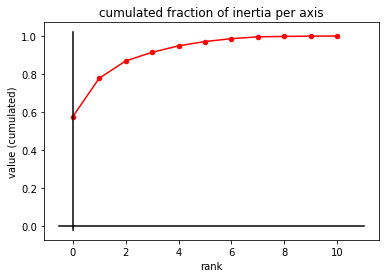

In [9]:
dio.plot_eig(L, frac=True, cum=True, dot_size=20, title = "cumulated fraction of inertia per axis")

It is possible to seect the dot size, the dot color, to plot the logarithm of the eigenvalues, and to save the plot. See the documentation for further details. 

### Plotting components


Each point $A[i,:]$ is projected on the principal axis as $Y[i,:]$ with $Y=AV$. If axis $j$ and $\ell$ are selected as `axis_1` and `axis_2`, a scatterplot with coordinates $(Y[i,j],Y[i,\ell])$ for point $i$ is displayed by a call to `plot_components_scatter()`.

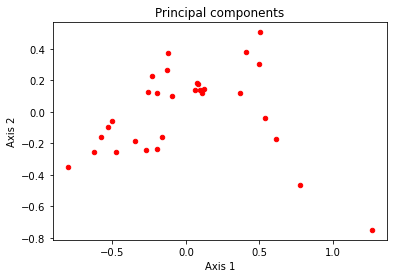

In [10]:
dio.plot_components_scatter(Y, title="Principal components")

It is possible to print some labels of the dots (one dot per row), with the argument `names`, as in 

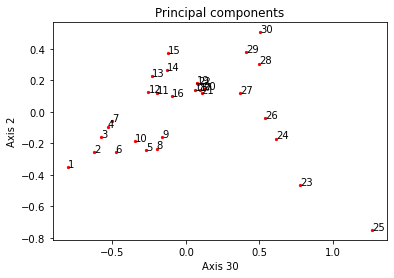

In [11]:
dio.plot_components_scatter(Y, dot_size=5, names=rownames, title="Principal components")

The plot can be saved by giving a filename and a format as arguments of `plot_components_scatter()`as in   
$\rightarrow$ (check that directory `plots` exists)

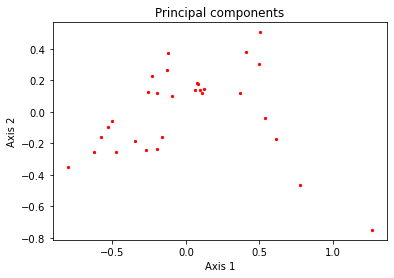

In [12]:
dio.plot_components_scatter(Y, dot_size=5, title="Principal components", plotdir="plots", plotfile="pca_components", fmt="png")

Other pairs of components can be plotted, as in

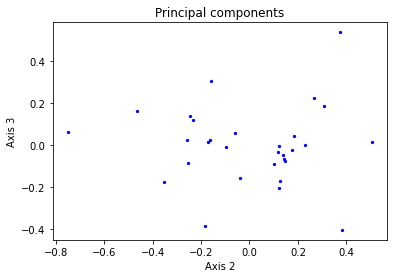

In [13]:
dio.plot_components_scatter(Y, axis_1=2, axis_2=3, dot_size=5, color="blue", title="Principal components")

### Plotting correlation between variables

Column $j$ of $V$ (i.e. $V[:,j]$) is the expression of new axis $j$ (principal axis) in the "old" basis. It is a linear combination of the variables (the old axis, with components as the columns of $A$). Column $j$ of $Y$ is the set of projections of all items on principal axis $j$; it is the $j-$th principal component of $A$.  This is expressed as $Y=AV$. $V$ is orthonormal $(V^t V = I_p)$. Hence, $V^{-1}=V^t$. The column $j$ of $V^{-1}$, i.e. the row $j$ of $V^t$, is the expression of the (old) variable in the (new) basis of the principal axis. This can be displayed graphically as follows, where both the correlations between the variables and between each variable and new axis can be seen and interpreted. Blue segments represent the projection of the variables (old axis) on the princpal (new) axis. The length of the projection represents its quality (how much the new axis encompasses the informtion in the old axis). If the projection of varables $j$ and $j'$ are both good, their cosine is an indicator of their correlation. 

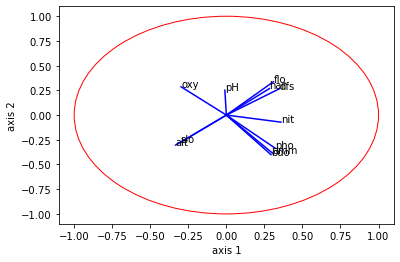

In [14]:
dio.plot_var(V, varnames=colnames)

A second way to visualize the correlations between the variables and the principal axis is to daw a heatmap of matrix $V$. Indeed, we have
$$
V[:,k] = \sum_j V[j,k] \mathbf{e}_j
$$
by construction. Then,
$$
V[j,k] = \langle V[:,k], \mathbf{e}_j \rangle
$$
and is the correlation between the (new) principal axis $k$ and the (old) variable $j$. This can be seen for all variables and axis by visualizing the heatmap of $V$, which can be done by a call to function $\texttt{plot_var_heatmap()}$. The matrix $V$ is printed first to facilitate the understanding of the process.

In [15]:
print("V =")
print(np.round(100*V)/100)

V =
[[ 0.35  0.27 -0.16 -0.09  0.21  0.33 -0.13  0.07 -0.01  0.13 -0.76]
 [-0.33 -0.3   0.13  0.21  0.08  0.07  0.27 -0.53 -0.23 -0.38 -0.42]
 [-0.3  -0.28 -0.21 -0.19 -0.4   0.63 -0.41 -0.11  0.04  0.1   0.08]
 [ 0.31  0.34 -0.19 -0.09  0.1   0.48  0.41 -0.27 -0.19 -0.22  0.41]
 [-0.01  0.25  0.91 -0.04 -0.02  0.28 -0.15 -0.03 -0.01  0.03  0.04]
 [ 0.28  0.27 -0.03  0.5  -0.72 -0.13 -0.07 -0.22 -0.03  0.   -0.09]
 [ 0.32 -0.34  0.14 -0.21 -0.18  0.06  0.36 -0.12  0.73 -0.04 -0.09]
 [ 0.36 -0.07  0.01 -0.44 -0.   -0.29 -0.51 -0.3  -0.12 -0.47  0.04]
 [ 0.31 -0.39  0.13 -0.24 -0.15 -0.08  0.21 -0.12 -0.53  0.56 -0.02]
 [-0.3   0.29  0.   -0.54 -0.45 -0.12  0.34  0.29 -0.15 -0.23 -0.22]
 [ 0.29 -0.4   0.09  0.24 -0.09  0.22  0.03  0.61 -0.23 -0.45 -0.  ]]


varnames are
dfs ; alt ; slo ; flo ; pH ; har ; pho ; nit ; amm ; oxy ; bdo


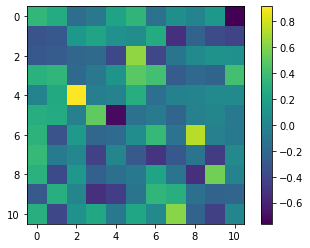

In [16]:
dio.plot_var_heatmap(V, varnames=colnames, cmap="viridis")

Variables are in rows, and principal axis in colums.

### Plotting cumulated quality of each item per axis 

The matrix $Y$ is the matrix of the coordinates of the items in the new basis, defined by principal axis (the columns of $V$). An item like $i$ is row $i$ of matrix $A$, i.e. $a_{i*} = A[i,:]$. Its coordinates in the basis of principal axis are $y_{i*} = Y[i,:]$. Let us denote by $y_{ir}$ the projection of $y_{i*}$ on the subspace defined by the first $r$ principal axis, i.e. $y_{ir} = (Y[i,1], \ldots,Y[1,r])$. Then, the quality of projection of item $i$ on the first $r$ axis is given by
$$
Q(i,r) = \frac{\|y_{ir}\|^2}{\|y_{i*}\|^2}
$$
The set of such qualities for all items is displayed by a call to function `plot_cumulated_quality_per_item()` as shown below.

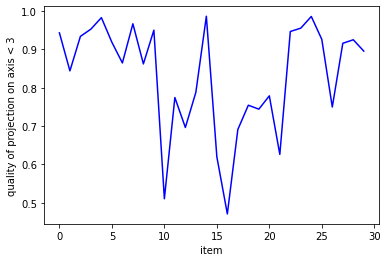

In [17]:
Qual = dio.plot_cumulated_quality_per_item(Y,r=3)

The matrix $Q$ with $Q[:,r]$ i.e. the matrix with the cumulated quality of projection for all items in column $r$, is given by a call to `dio.plot_cumulated_quality_per_item()`. In this plot, we have, once the axis $r$ has been selected
* the items $i$ on $x$ axis
* $Q[i,r]$ on the $y$ axis

### Scatter plot with components quality

The cumulated quality per axis can be displayed in a second way, in a scatterplot. Here is an example with scatter plot of axis 1 and 2.

In [18]:
r = 2
dio.plot_components_quality(Y, Qual, r=r)

This is the scatter plot of the point cloud of components on axis 1 and 2. The color and the size of one dot (one item) indicate the cumulated quality on the $r$ first principlal axis (here, $r=2$). Next plot is the scatter plot on axis 1 and 3, with cumulated quality on axis 3. 

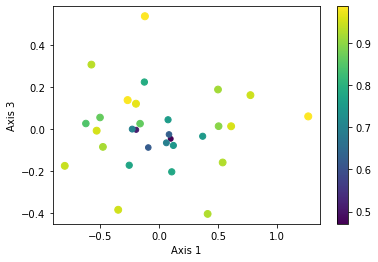

In [19]:
r = 3
dio.plot_components_quality(Y, Qual, axis_2=3, r=r)

## References

### For PCA

- T. W. Anderson. An introduction to Multivariate Statistical Analysis. John Wiley & Sons, 1958.
- A. J. Izenman. Modern Multivariate Statistical Techniques. Springer, NY, 2008.
- I. T. Jolliﬀe. Principal Component Analysis. Springer, second edition, 2002.
- L. Lebart, A. Morineau, and N. Tabard. Techniques de la description statistique. Bordas - Dunod, 1977.
- L. Lebart, A. Morineau, and J.-P. Fénelon. Traitement des données statistiques. Dunod, Paris, 1982.
- K. V. Mardia, J.T. Kent, and J. M. Bibby. Multivariate Analysis. Probability and Mathematical Statistics. Academic Press, 1979.

### For softwares

- the python library is called `pydiodon` and can be downloaded from https://gitlab.inria.fr/diodon/pydiodon

### Useful companions:

Useful companions to run this notebook are:

**why it works:** the presentation of the methods from a linear algebra viewpoint, available at https://arxiv.org/abs/2209.13597   
**how it works:** the online documentation of pydiodon, available at https://diodon.gitlabpages.inria.fr/pydiodon


### Authors
Alain Franc   
Jean-Marc Frigerio

### Contributors¶
Olivier Coulaud   
Rémy Peressoni   
Florent Pruvost   

### Contact and maintainer
Alain Franc, alain.franc@inrae.fr

# That's all, folks!